### 사전준비

In [1]:
# 기본 패키지 import
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mbl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글/차트 마이너스 깨짐현상 해결/ seaborn 한글설정
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

#### 합성곱신경망 이미지 분류

In [3]:
from tensorflow import keras
from tensorflow.keras.datasets.fashion_mnist import load_data
from sklearn.model_selection import train_test_split

In [4]:
(train_input, train_target), (test_input, test_target) = load_data()

In [5]:
train_scaled = train_input.reshape(-1, 28, 28, 1)/255.0
train_scaled.shape

(60000, 28, 28, 1)

In [6]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [7]:
print(train_scaled. shape, train_target.shape)
print(val_scaled. shape, val_target.shape)

(48000, 28, 28, 1) (48000,)
(12000, 28, 28, 1) (12000,)


#### 합성곱 신경망 생성

In [14]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))  # 14x14 특성맵 = 32
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))  # 7x7 특성맵 = 64

In [17]:
model.add(keras.layers.Flatten())  # 7x7x64 + 64
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))  # 60개 노드만 통과
model.add(keras.layers.Dense(10, activation='softmax'))

In [18]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)              

In [19]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


#### 모델 컴파일 훈련

In [20]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')
checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_model.h5', save_best_only=True, verbose=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True, verbose=1)
history = model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target),
                               callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - ETA: 0s - loss: 0.6259 - accuracy: 0.7744
Epoch 1: val_loss improved from inf to 0.34739, saving model to ./data\best_model.h5
1500/1500 [==============================] - 32s 21ms/step - loss: 0.6259 - accuracy: 0.7744 - val_loss: 0.3474 - val_accuracy: 0.8723
Epoch 2/20
1500/1500 [==============================] - ETA: 0s - loss: 0.3917 - accuracy: 0.8632
Epoch 2: val_loss improved from 0.34739 to 0.30943, saving model to ./data\best_model.h5
1500/1500 [==============================] - 34s 23ms/step - loss: 0.3917 - accuracy: 0.8632 - val_loss: 0.3094 - val_accuracy: 0.8859
Epoch 3/20
1499/1500 [============================>.] - ETA: 0s - loss: 0.3281 - accuracy: 0.8850
Epoch 3: val_loss improved from 0.30943 to 0.27090, saving model to ./data\best_model.h5
1500/1500 [==============================] - 31s 21ms/step - loss: 0.3281 - accuracy: 0.8850 - val_loss: 0.2709 - val_accuracy: 0.9003
Epoch 4/20
1500/1500 [================

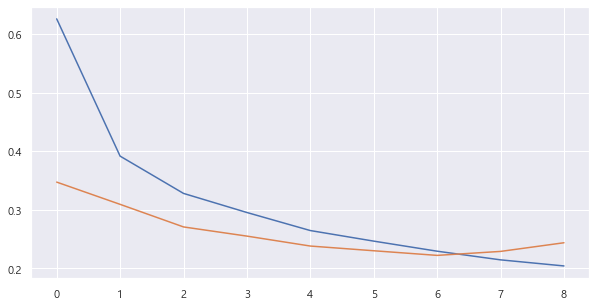

In [22]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [23]:
early_stopping_cb.stopped_epoch

8

In [24]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 6ms/step - loss: 0.2223 - accuracy: 0.9200


[0.2223452925682068, 0.9200000166893005]

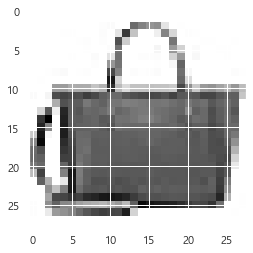

In [25]:
plt.imshow(X=val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

In [26]:
# 예측
result = model.predict(val_scaled[0:1])
result

1/1 [==============================] - 0s 128ms/step


array([[4.68897056e-20, 2.72035708e-37, 2.84718858e-25, 1.39960858e-31,
        5.73269133e-23, 1.40946346e-21, 1.25890354e-20, 5.58316503e-25,
        1.00000000e+00, 1.07283382e-25]], dtype=float32)

In [27]:
val_labels = np.argmax(model.predict(val_scaled[0:1]), axis=1)
val_labels

1/1 [==============================] - 0s 22ms/step


array([8], dtype=int64)

In [28]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클부츠']

In [29]:
print(classes[np.argmax(result)])

가방
